In [17]:
import math
import torch
import numpy as np
import gpytorch
import pandas as pd
import seaborn as sns
import os
import pickle
import matplotlib.pyplot as plt
import matplotlib 

In [18]:
# temp performance plotting (manual input) 

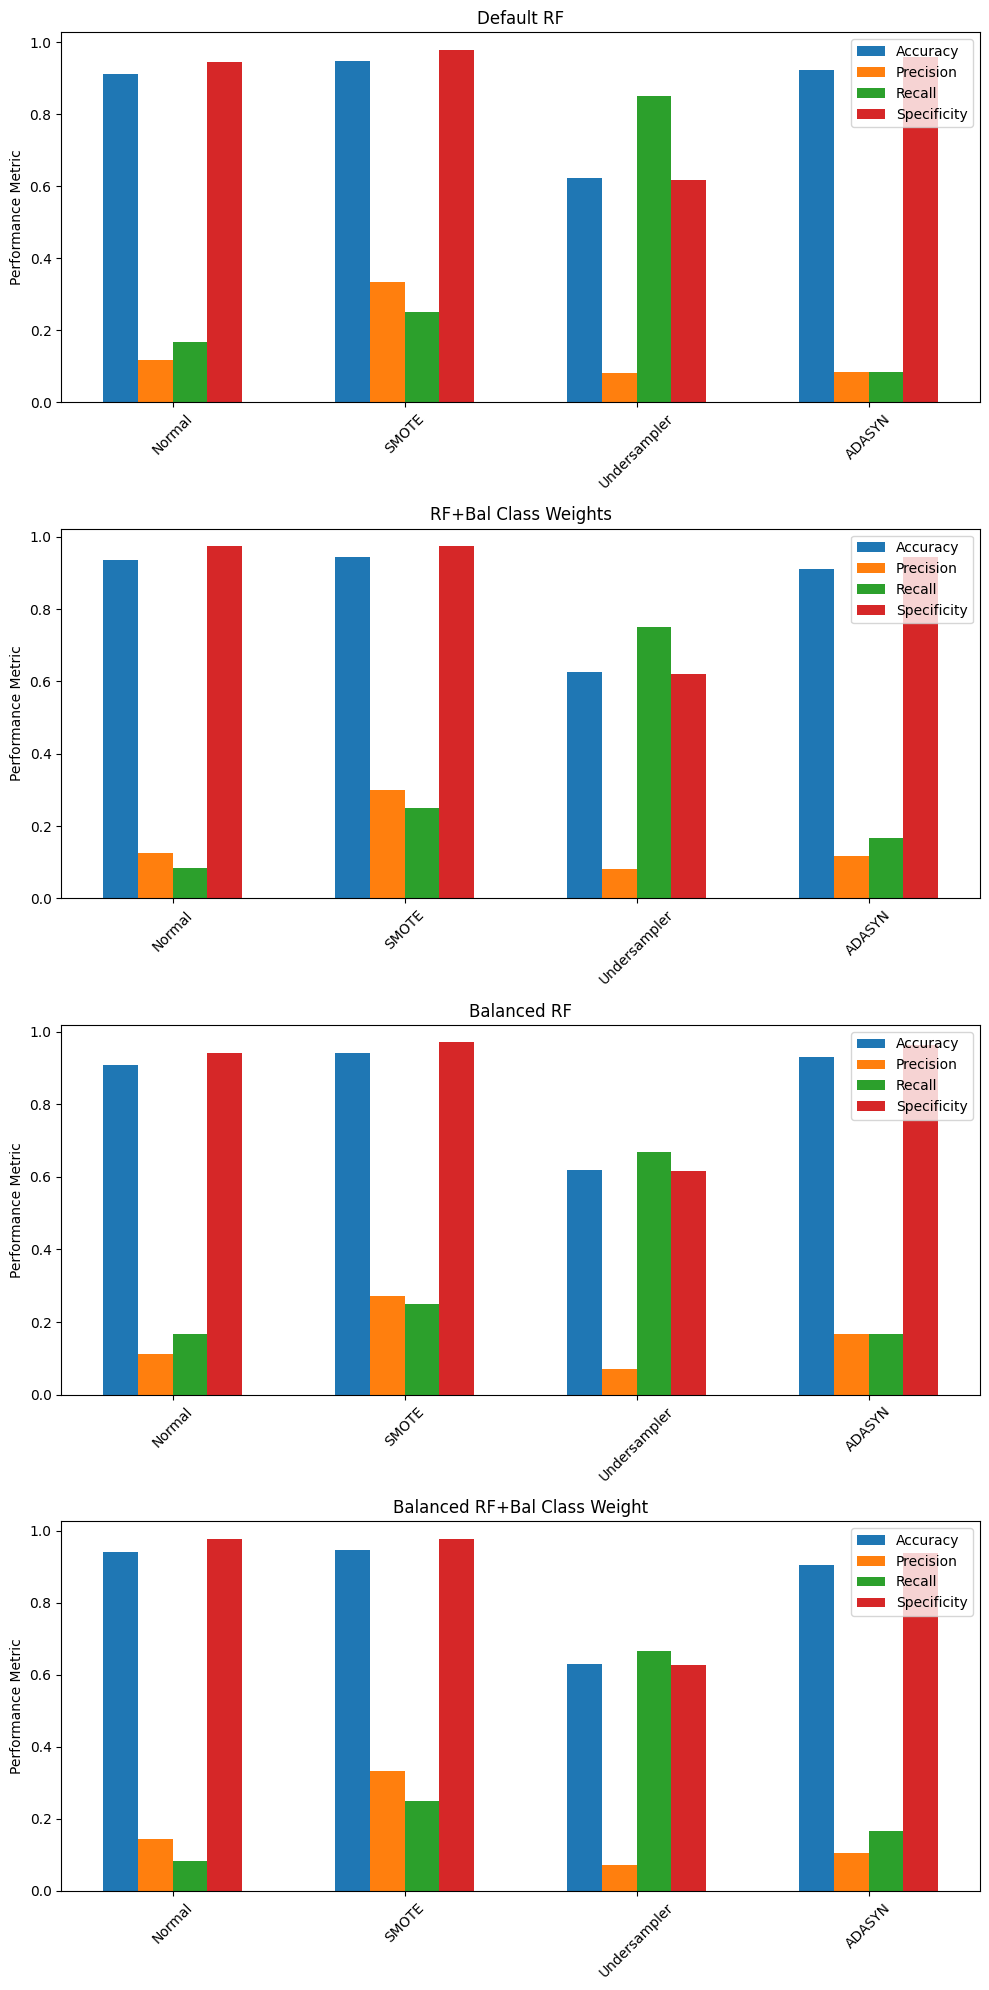

In [29]:
sampling = ['Normal', 'SMOTE', 'Undersampler', 'ADASYN']
models = ['Default RF', 'RF+Bal Class Weights', 'Balanced RF', 'Balanced RF+Bal Class Weight']
# for each sublist = metric for a model type 
# for each val in sublist = sampling technique 
accuracy= [[0.912, 0.947, 0.622, 0.922 ],
           [0.936, 0.943, 0.625, 0.912],
          [0.908, 0.94, 0.618, 0.929],
          [0.94, 0.947, 0.629, 0.905]]
precision = [[0.118, 0.333, 0.080, 0.083],
             [0.125, 0.3, 0.080, 0.118],
            [0.111, 0.273, 0.071, 0.167],
            [0.143, 0.333, 0.073, 0.105]]
recall = [[0.167, 0.25, 0.75, 0.083],
          [0.083, 0.25, 0.75, 0.167],
         [0.167, 0.25, 0.667, 0.167],
         [0.083, 0.25, 0.667, 0.167]]
specificity = [[0.945, 0.978, 0.616, 0.959],
               [0.974, 0.974, 0.62, 0.945],
              [0.941, 0.97, 0.616, 0.963],
              [0.978, 0.978, 0.627, 0.937]]

bar_width = 0.15
index = np.arange(len(sampling))

fig, axs = plt.subplots(4, 1, figsize=(10, 20), sharex=False)

for i, model in enumerate(models):
    # Plot bars for each performance metric
    axs[i].bar(index, accuracy[i], bar_width, label='Accuracy')
    axs[i].bar(index + bar_width, precision[i], bar_width, label='Precision')
    axs[i].bar(index + 2 * bar_width, recall[i], bar_width, label='Recall')
    axs[i].bar(index + 3 * bar_width, specificity[i], bar_width, label='Specificity')

    axs[i].set_title(model)
    axs[i].set_ylabel('Performance Metric')
    axs[i].set_xticks(index + 1.5 * bar_width)
    axs[i].set_xticklabels(sampling)
    axs[i].legend()


    axs[i].tick_params(axis='x', labelrotation=45)

plt.tight_layout()

plt.show()

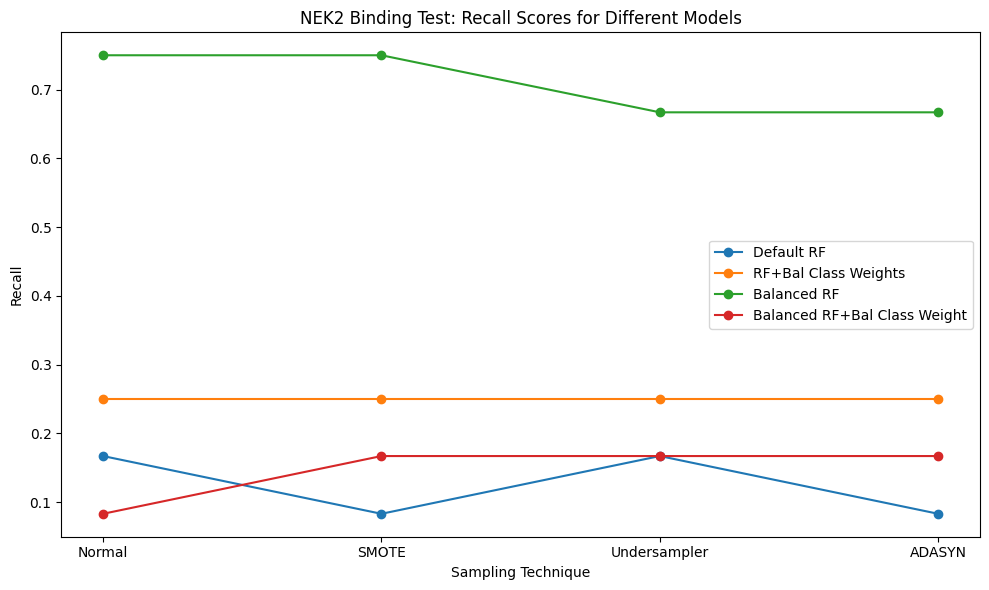

In [46]:
recall = [[0.167, 0.25, 0.75, 0.083],
          [0.083, 0.25, 0.75, 0.167],
         [0.167, 0.25, 0.667, 0.167],
         [0.083, 0.25, 0.667, 0.167]]
fig, ax = plt.subplots(figsize=(10, 6))

for i, model in enumerate(models):
    ax.plot(sampling, [row[i] for row in recall], marker='o', label=model)

ax.set_xlabel('Sampling Technique')
ax.set_ylabel('Recall')
ax.set_title('NEK2 Binding Test: Recall Scores for Different Models')
ax.legend()

plt.tight_layout()
plt.show()
    

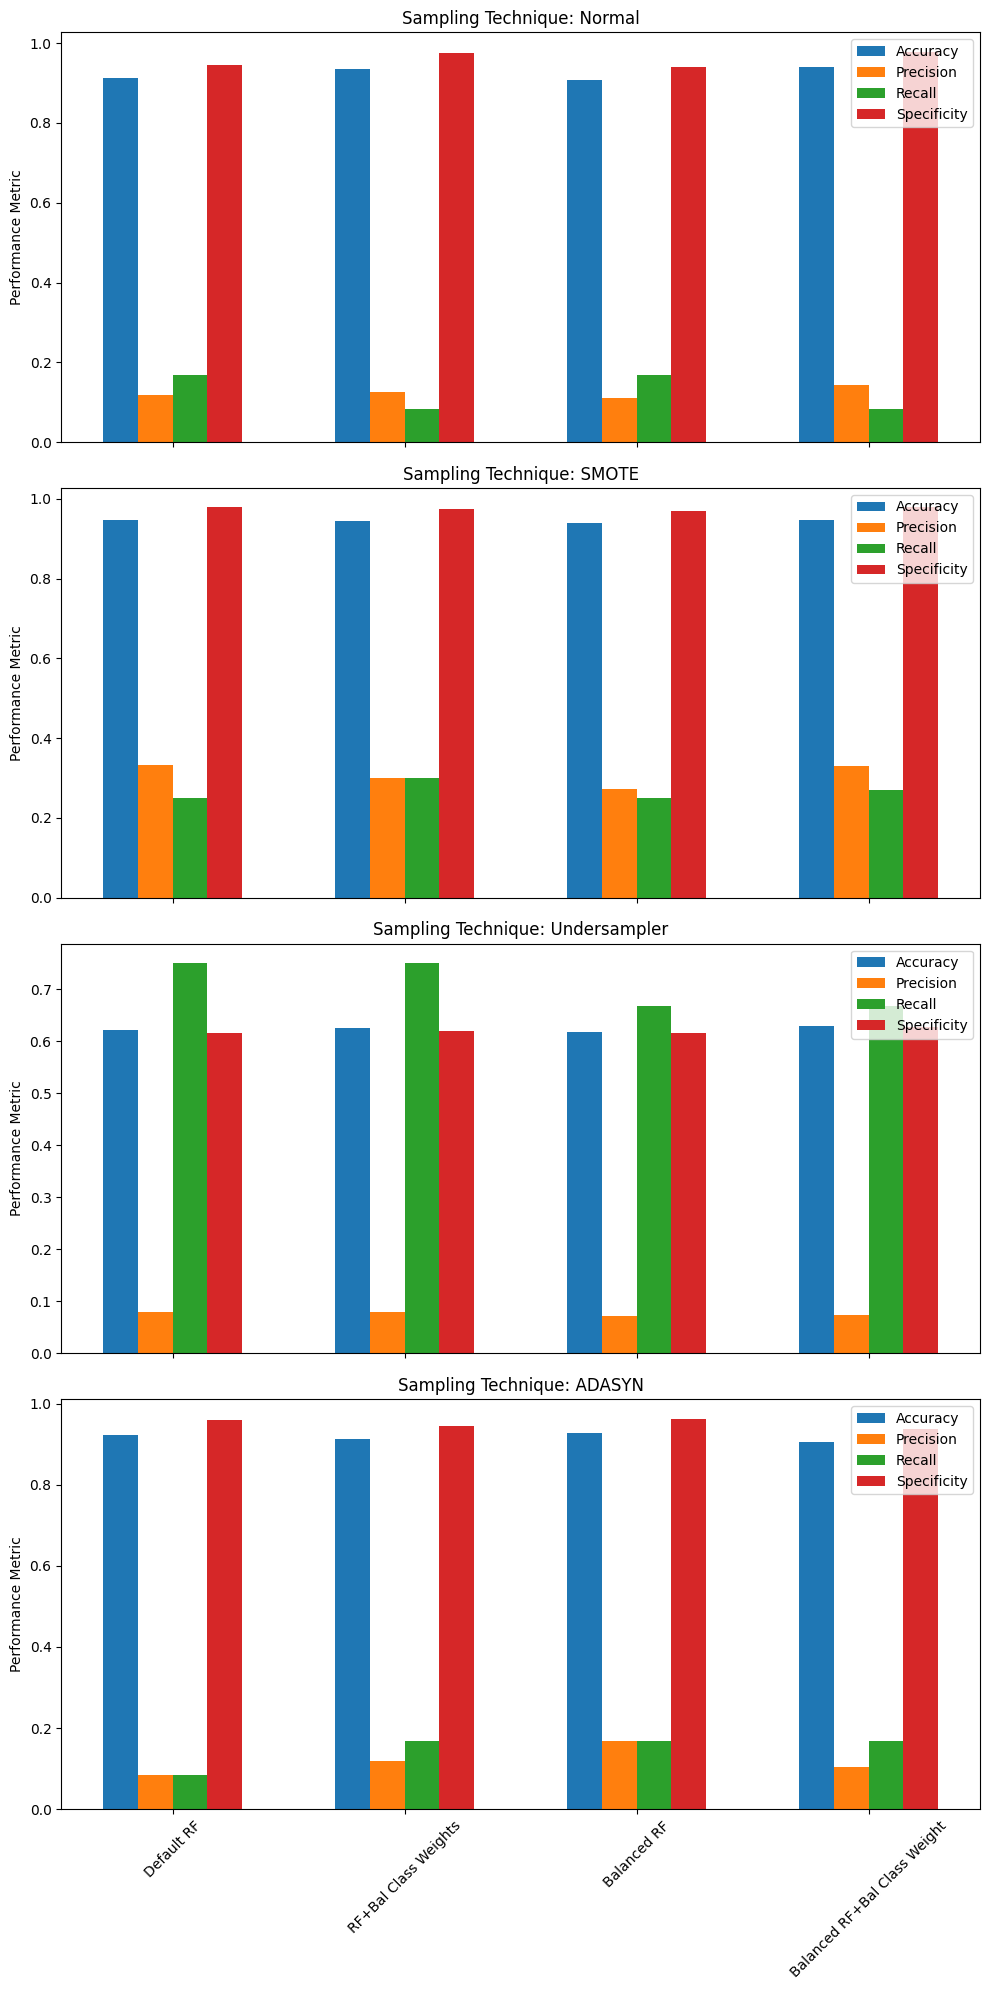

In [43]:
sampling = ['Normal', 'SMOTE', 'Undersampler', 'ADASYN']
models = ['Default RF', 'RF+Bal Class Weights', 'Balanced RF', 'Balanced RF+Bal Class Weight']
# for a certain type of sampling technique, 
    # for a model
accuracy= [[0.912, 0.936, 0.908,0.940 ],
           [0.947,0.943,0.940,0.947],
          [0.622, 0.625, 0.618, 0.629],
          [0.922, 0.912, 0.929, 0.905]]
precision = [[0.118,0.125,0.111, 0.143],
             [0.333,0.3, 0.273, 0.33],
            [0.08, 0.08, 0.071,0.073 ],
            [0.083, 0.118, 0.167, 0.105]]
recall = [[0.167,0.083,0.167,0.083],
          [0.25, 0.3,0.25, 0.27],
         [0.75, 0.75, 0.667, 0.667],
         [0.083, 0.167, .167, .167]]
specificity = [[0.945,0.974,0.941,0.978],
               [0.978,0.974,0.97,0.978],
              [0.616, 0.62, 0.616, 0.627 ],
              [0.959, 0.945, 0.963, 0.937]]
bar_width = 0.15
index = np.arange(len(models))

fig, axs = plt.subplots(len(sampling), 1, figsize=(10, 20), sharex=True)

for i, sample in enumerate(sampling):
    axs[i].bar(index, accuracy[i], bar_width, label='Accuracy')
    axs[i].bar(index + bar_width, precision[i], bar_width, label='Precision')
    axs[i].bar(index + 2 * bar_width, recall[i], bar_width, label='Recall')
    axs[i].bar(index + 3 * bar_width, specificity[i], bar_width, label='Specificity')

    axs[i].set_title(f'Sampling Technique: {sample}')
    axs[i].set_ylabel('Performance Metric')
    axs[i].set_xticks(index + 1.5 * bar_width)
    axs[i].set_xticklabels(models, rotation=45)
    axs[i].legend(loc='upper right')

plt.tight_layout()
plt.show();

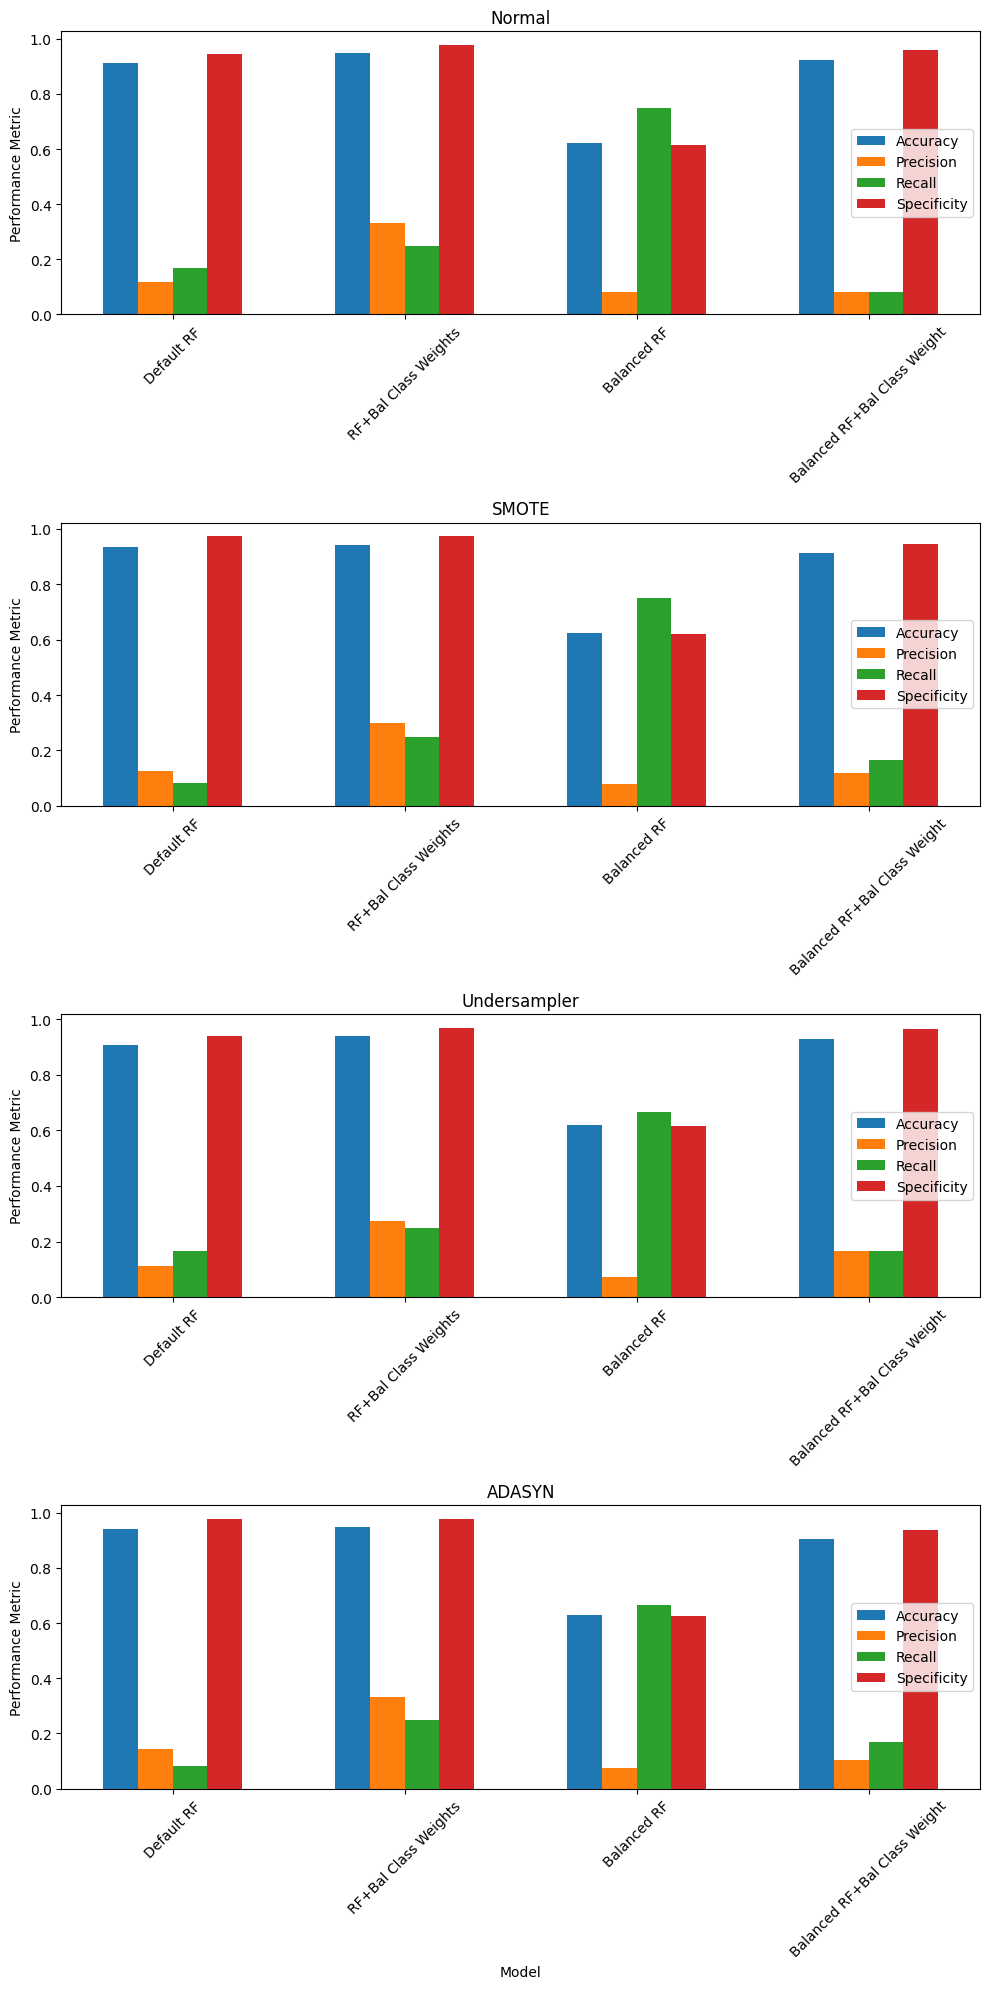

In [40]:
bar_width = 0.15
index = np.arange(len(models))

fig, axs = plt.subplots(len(sampling), 1, figsize=(10, 20), sharex=False)

for i, sample in enumerate(sampling):
    axs[i].bar(index, accuracy[i], bar_width, label='Accuracy')
    axs[i].bar(index + bar_width, precision[i], bar_width, label='Precision')
    axs[i].bar(index + 2 * bar_width, recall[i], bar_width, label='Recall')
    axs[i].bar(index + 3 * bar_width, specificity[i], bar_width, label='Specificity')

    axs[i].set_title(sample)
    axs[i].set_ylabel('Performance Metric')
    axs[i].set_xticks(index + 1.5 * bar_width)
    axs[i].set_xticklabels(models, rotation=45)
    axs[i].legend(loc='center right')

plt.xlabel('Model')

plt.tight_layout()

plt.show()

# Inhibition

In [ ]:
sampling = ['Normal', 'SMOTE', 'Undersampler', 'ADASYN']
models = ['Default RF', 'RF+Bal Class Weights', 'Balanced RF', 'Balanced RF+Bal Class Weight']
# for each sublist = metric for a model type 
# for each val in sublist = sampling technique 
accuracy= [[],
           [],
          [],
          []]
precision = [[],
             [],
            [],
            []]
recall = [[],
          [],
         [],
         []]
specificity = [[],
               [],
              [],
              []]

bar_width = 0.15
index = np.arange(len(sampling))

fig, axs = plt.subplots(4, 1, figsize=(10, 20), sharex=False)

for i, model in enumerate(models):
    # Plot bars for each performance metric
    axs[i].bar(index, accuracy[i], bar_width, label='Accuracy')
    axs[i].bar(index + bar_width, precision[i], bar_width, label='Precision')
    axs[i].bar(index + 2 * bar_width, recall[i], bar_width, label='Recall')
    axs[i].bar(index + 3 * bar_width, specificity[i], bar_width, label='Specificity')

    axs[i].set_title(model)
    axs[i].set_ylabel('Performance Metric')
    axs[i].set_xticks(index + 1.5 * bar_width)
    axs[i].set_xticklabels(sampling)
    axs[i].legend()


    axs[i].tick_params(axis='x', labelrotation=45)

plt.tight_layout()

plt.show()

In [2]:
split_path = '../../../../data/NEK_data_4Berkeley/NEK2/'
train_x_df = pd.read_csv(split_path+"/NEK2_binding_random_fold1_trainX.csv")
train_y_df= pd.read_csv(split_path+"/NEK2_binding_random_fold1_trainY.csv")
test_x_df= pd.read_csv(split_path+"/NEK2_binding_random_fold1_testX.csv")
test_y_df= pd.read_csv(split_path+"/NEK2_binding_random_fold1_testY.csv")
train_x = torch.from_numpy(train_x_df.to_numpy())
train_y = torch.from_numpy(train_y_df.to_numpy().reshape(-1))
test_x = torch.from_numpy(test_x_df.to_numpy())
test_y = torch.from_numpy(test_y_df.to_numpy().reshape(-1))


# Common FN indices 
(array([271, 272, 273, 274, 275, 277, 279, 280, 281, 282]),)